In [45]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib notebook 

import warnings 
warnings.filterwarnings("ignore")

In [2]:
#loading the data
pima_data = pd.read_csv("diabetes.csv")
pima_data

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Coloumn Names:

# 1. Number of times pregnant
# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# 3. Diastolic blood pressure (mm Hg)
# 4. Triceps skin fold thickness (mm)
# 5. 2-Hour serum insulin (mu U/ml)
# 6. Body mass index (weight in kg/(height in m)^2)
# 7. Diabetes pedigree function
# 8. Age (years)
# 9. Class variable (0 or 1)

In [4]:
labels = ["Pregnant", "Glucose", "BloodPressure", "Skinthickness", "insulin", "BMI", "DPF", "Age", "Outcome"]

In [5]:
pima_data = pd.read_csv("diabetes.csv", names= labels)
pima_data.head()

,Pregnant,Glucose,BloodPressure,Skinthickness,insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
pima_data.dtypes

Pregnant           int64
Glucose            int64
BloodPressure      int64
Skinthickness      int64
insulin            int64
BMI              float64
DPF              float64
Age                int64
Outcome            int64
dtype: object

In [7]:
#coverting target varible to categorical attribute  
pima_data["Outcome"] = pima_data["Outcome"].astype ("category")

In [8]:
pima_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Pregnant       768 non-null    int64   
 1   Glucose        768 non-null    int64   
 2   BloodPressure  768 non-null    int64   
 3   Skinthickness  768 non-null    int64   
 4   insulin        768 non-null    int64   
 5   BMI            768 non-null    float64 
 6   DPF            768 non-null    float64 
 7   Age            768 non-null    int64   
 8   Outcome        768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [9]:
pima_data.describe()

,Pregnant,Glucose,BloodPressure,Skinthickness,insulin,BMI,DPF,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [10]:
pima_data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<IPython.core.display.Javascript object>


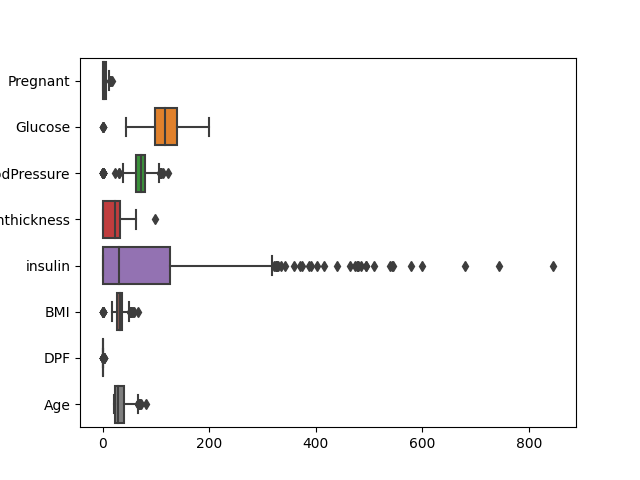

In [11]:
fig,axs = plt.subplots()
sns.boxplot(data=pima_data,orient = 'h')
plt.show()

<IPython.core.display.Javascript object>


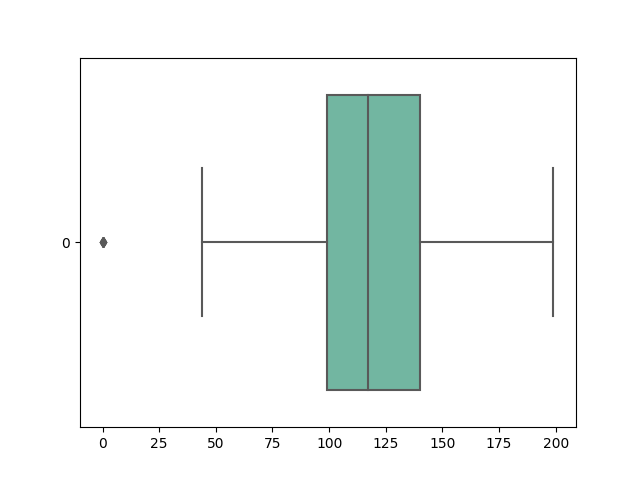

In [12]:
fig, axs = plt.subplots()
sns.boxplot(data = pima_data['Glucose'],orient = 'h',palette = "Set2")
plt.show()

In [13]:
q75, q25 = np.percentile(pima_data["insulin"], [75, 25])
iqr = q75-q25
print("IQR", iqr)
whisker = q75+(1.5*iqr)
pima_data["insulin"] = pima_data["insulin"].clip(upper = whisker)

IQR 127.25


In [14]:
q75,q25 = np.percentile(pima_data["Glucose"],[75,25])
iqr =q75-q25
print('IQR',iqr)
whisker = q25-(1.5*iqr)
pima_data["Glucose"] = pima_data["Glucose"].clip(lower = whisker)

IQR 41.25


<IPython.core.display.Javascript object>


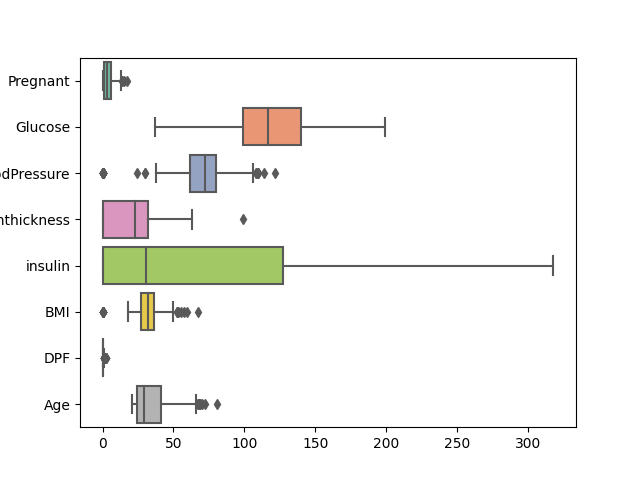

In [15]:
fig,axes = plt.subplots()
sns.boxplot(data=pima_data,orient = 'h',palette = 'Set2')
plt.show()

In [16]:
print((pima_data.iloc[:, [1,2,3,4,5]]==0).sum())

Glucose            0
BloodPressure     35
Skinthickness    227
insulin          374
BMI               11
dtype: int64


In [18]:
pima_data.iloc[:,[1,2,3,4,5]] =pima_data.iloc[:,[1,2,3,4,5]].replace(0,np.NaN)
pima_data.head()

,Pregnant,Glucose,BloodPressure,Skinthickness,insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [19]:
pima_data.isnull().sum()

Pregnant           0
Glucose            0
BloodPressure     35
Skinthickness    227
insulin          374
BMI               11
DPF                0
Age                0
Outcome            0
dtype: int64

In [21]:
pima_data.isnull().mean()

Pregnant         0.000000
Glucose          0.000000
BloodPressure    0.045573
Skinthickness    0.295573
insulin          0.486979
BMI              0.014323
DPF              0.000000
Age              0.000000
Outcome          0.000000
dtype: float64

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy = 'mean')
imputer.fit(pima_data)
imputed_data = pd.DataFrame(imputer.fit_transform(pima_data), columns=labels)

In [24]:
imputed_data

,Pregnant,Glucose,BloodPressure,Skinthickness,insulin,BMI,DPF,Age,Outcome
0,6.0,148.0,72.0,35.00000,143.566624,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,143.566624,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,143.566624,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.00000,180.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.00000,143.566624,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.00000,112.000000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,29.15342,143.566624,30.1,0.349,47.0,1.0


In [26]:
imputed_data.isnull().mean()

Pregnant         0.0
Glucose          0.0
BloodPressure    0.0
Skinthickness    0.0
insulin          0.0
BMI              0.0
DPF              0.0
Age              0.0
Outcome          0.0
dtype: float64

In [27]:
labels_std = ["Pregnant", "Glucose", "BloodPressure", "Skinthickness", "insulin", "BMI", "DPF", "Age"]

In [31]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
std_data = pd.DataFrame(standardizer.fit_transform(imputed_data.iloc[:, 0:8]),columns = labels_std)
std_data

,Pregnant,Glucose,BloodPressure,Skinthickness,insulin,BMI,DPF,Age
0,0.639947,0.861926,-0.033518,6.655021e-01,0.000000,0.166292,0.468492,1.425995
1,-0.844885,-1.159433,-0.529859,-1.746338e-02,0.000000,-0.852531,-0.365061,-0.190672
2,1.233880,1.984903,-0.695306,8.087936e-16,0.000000,-1.332833,0.604397,-0.105584
3,-0.844885,-1.031093,-0.529859,-7.004289e-01,-0.826602,-0.634212,-0.920763,-1.041549
4,-1.141852,0.508990,-2.680669,6.655021e-01,0.407465,1.548980,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.646072,0.297376,2.145261e+00,0.607584,0.064409,-0.908682,2.532136
764,-0.547919,0.027714,-0.198965,-2.451185e-01,0.000000,0.632039,-0.398282,-0.531023
765,0.342981,-0.004371,-0.033518,-7.004289e-01,-0.526423,-0.910750,-0.685193,-0.275760
766,-0.844885,0.156054,-1.026200,8.087936e-16,0.000000,-0.343120,-0.371101,1.170732


In [37]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
std_data.shape

(768, 8)

In [39]:
Y = pima_data.iloc[:, 8]

In [41]:
X_train,X_test,Y_train,Y_test= train_test_split(std_data,Y,test_size=0.2,random_state= 123)

In [46]:
model = XGBClassifier(n_estimators = 90,max_depth = 3)
model.fit(X_train,Y_train)

[08:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=8,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=None)

In [49]:
Y_pred = model.predict(X_test)

In [50]:
accuracy = accuracy_score(Y_test,Y_pred)

In [51]:
accuracy

0.7792207792207793